# **Title:  Intrusion Detection System**

The area of network security has received a significant level of attention over the years in the research community due to its importance in protecting companies’ systems and data infrastructures against adversarial attacks. This attention is as a result of increased cyber-attacks which has caused significant financial losses and reputation damage to companies. Machine learning methods have been presented as the solution to these problems because they do not rely on pattern matching and deep packet inspection. They are more generalizable in detecting unseen and future intrusion patterns. They are widely used in this field and have shown incredible performance in protecting systems against attacks. Researchers have made use of various ML-based classifiers, such as Logistic regression, Convolutional Neural Network, Support Vector Machine (SVM), Recurrent Neural Network, Fuzzy Logic, and Decision Tree to detect malicious traffic as well as discover unseen attacks that deviate from normal profile (Islam et al. 2021). Despite the high performance and accuracy of these machine learning models in detecting intrusion they tend to lack transparency because the human observer cannot understand the logic used by the models to arrive at an answer. The models use complex processes to classify an input as benign or malign and these processes are not visible to the human observer creating trust issues (Belle and Papantonis 2021. This project aims to employ explainable AI techniques such as LIME and SHAP to interpret and display the inner workings of some simple machine learning models for intrusion detection.



**Sections Covered in this project are:**


1. Data Exploration




2. Data Preparation




4. Model Developemnt



5. Model Evaluation


6. Model Explanation

## **Data Exploration**

This phase entails exploring the data to identify data quality issues. The following are covered in this section.


1. import relevant libraries for the work

2. Inspecting first 10 and  last 10 rows

3. Check for data types of features

4. Check for missing values

5. Check for imbalance of the target variable/feature

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=21fda8f9b799accc913a0647d828f6ced1880c13cbc892e6a381c0678088c86b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
!pip install shap

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier



**Mount the drive on the notebook to make it possible to easily read data from the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# pd.set_option("display.max_rows",None,"display.max_columns",None)

Load and read dataset into pandas dataframe called "df"

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/data/combine.csv")

<ipython-input-3-6a133b59d539>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/content/drive/MyDrive/data/combine.csv")


Check the first ten rows

In [ ]:
dataset.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
5,54871,1022.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
6,54925,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
7,54925,42.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
8,9282,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
9,55153,4.0,2.0,0.0,37.0,0.0,31.0,6.0,18.5,17.67767,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


Check the last 10 rows

In [ ]:
dataset.tail(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2214459,35450,33.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214460,53,46982.0,2.0,2.0,58.0,446.0,29.0,29.0,29.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214461,80,11512230.0,5.0,5.0,672.0,3525.0,672.0,0.0,134.4,300.527536,...,32.0,821.0,0.0,821.0,821.0,6506213.0,0.0,6506213.0,6506213.0,DoS GoldenEye
2214462,49346,145.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214463,53,32215.0,4.0,2.0,112.0,152.0,28.0,28.0,28.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214464,53,324.0,2.0,2.0,84.0,362.0,42.0,42.0,42.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214465,58030,82.0,2.0,1.0,31.0,6.0,31.0,0.0,15.5,21.920310,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214466,53,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,32.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214467,53,94939.0,4.0,2.0,188.0,226.0,47.0,47.0,47.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214468,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the number of columns and rows

In [ ]:
dataset.shape

(2214469, 79)

there are 2214469 rows and 79 columns(features)


Inspect the datatypes of each of the variables

In [ ]:
dataset.dtypes

,0
Destination Port,object
Flow Duration,float64
Total Fwd Packets,float64
Total Backward Packets,float64
Total Length of Fwd Packets,float64
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,float64
Idle Min,float64


This dataset has 2,214,469 observations and 79 variables, of which only two are categorical variables—“Destination Port” and “Label.”

Counting " Destination Port"

In [ ]:
# df[" Destination Port"].value_counts()

In [ ]:

dataset[" Destination Port"].shape

(2214469,)

checking for the presence of missing values



In [ ]:
dataset.isnull().sum()

,0
Destination Port,0
Flow Duration,1
Total Fwd Packets,1
Total Backward Packets,1
Total Length of Fwd Packets,1
...,...
Idle Mean,1
Idle Std,1
Idle Max,1
Idle Min,1


There were missing values in almost all the variables and Flow Bytes/s has the hghest number of missng values of	1138

Missing values by percentage

In [ ]:
dataset.isnull().mean()

,0
Destination Port,0.000000e+00
Flow Duration,4.515755e-07
Total Fwd Packets,4.515755e-07
Total Backward Packets,4.515755e-07
Total Length of Fwd Packets,4.515755e-07
...,...
Idle Mean,4.515755e-07
Idle Std,4.515755e-07
Idle Max,4.515755e-07
Idle Min,4.515755e-07


Check for imbalance of the Target variable

In [ ]:
dataset[' Label'].value_counts()

,count
Label,
BENIGN,1672837
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
DoS slowloris,5796
DoS Slowhttptest,5499
Bot,1966
Infiltration,36


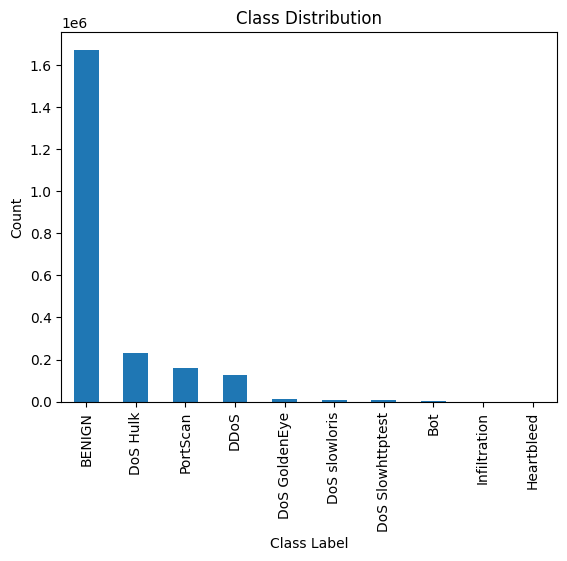

In [ ]:
import matplotlib.pyplot as plt
dataset[' Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

The dataset exhibited a significant imbalance, with attacks accounting for just 24% and the benign class comprising 76%. This disparity can cause the algorithm to favor the overrepresented class, resulting in increased rates of false positives and false negatives. To address this problem, an under-sampling technique was employed during the data preparation phase, reducing the majority class to match the size of the minority class.

**Convert the Target variable into binomial variable with two values:** **Benign and Attack**. Transform the target variable into a binary format, consisting of two distinct categories: Benign and Attack. The term "Attack" encompasses all forms of attacks represented in the dataset.

In [ ]:
# List of attack labels to combine
attack_labels = ["DoS Hulk", "PortScan", "DDoS", "DoS GoldenEye", "DoS slowloris",
                 "DoS Slowhttptest", "Bot", "Infiltration", "Heartbleed"]

# Replace specified attack labels with "Attack"
dataset.loc[dataset[' Label'].isin(attack_labels), ' Label'] = "Attack"

In [ ]:
# Calculate the percentage of each label
label_counts = dataset[' Label'].value_counts(normalize=True) * 100

# Print the percentages
label_counts

,proportion
Label,
BENIGN,75.541259
Attack,24.458741


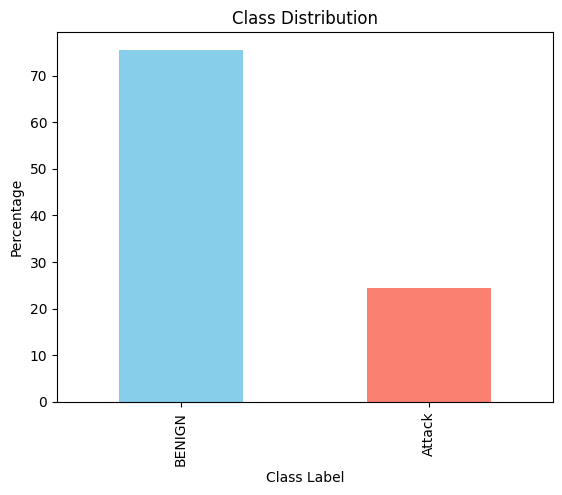

In [ ]:

# Calculate the percentage of each label
label_counts = dataset[' Label'].value_counts(normalize=True) * 100

# Create the bar plot with different colors
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])  # Example colors

plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Percentage') # Changed to percentage
plt.show()

The dataset exhibits a significant imbalance, with only 24.46% of the samples categorized as Attacks, while a substantial 75.54% are classified as Normal network activity. To ensure that the model effectively learns from both classes, it is essential to balance the data. This will be achieved through the application of an undersampling technique.

## **Data Preparation**

Handling Rare lables:

Rare labels refer to values within categorical variables that appear infrequently in a dataset (Georgiannacambel 2020). These infrequent values often lead to dimensionality challenges when partitioning the data, as they may be included in the training set but not in the testing set, or occur the other way around. In this dataset, such rare labels were identified in the "Destination Port" and "Label" variables. Specifically, within the "Destination Port" variable, only the top five labels were retained, while all other labels were grouped together and categorized as "others."

In [ ]:
# Group by 'Destination Port' and get the top 5 ports
ports = dataset[' Destination Port'].value_counts().nlargest(5).index


In [ ]:
ports

Index([53, 80, 443, 123, 22], dtype='int64', name=' Destination Port')

In [ ]:
# Create a new column 'Destination Port Grouped'
dataset['Destination Port category'] = dataset[' Destination Port'].apply(lambda x: x if x in ports else 'Rare')

In [ ]:
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Destination Port category
0,54865,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Rare
1,55054,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Rare
2,55055,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Rare
3,46236,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Rare
4,54863,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Rare


convert the categorized ' Destination Port' to string datatype

In [ ]:
dataset['Destination Port category'] = dataset['Destination Port category'].astype('string')

Convert the categorized ' Destination Port' to numerical vectors. This was done by reprenting the categories with numbers:

In [ ]:
# Create a mapping dictionary
port_mapping = {port: i for i, port in enumerate(dataset['Destination Port category'].unique())}

dataset['Encoded Port'] = dataset['Destination Port category'].map(port_mapping)

In [ ]:
dataset['Encoded Port'].unique()

array([0, 1, 2, 3, 4, 5])

### **Handling Missing Values**

The missing values were fixed using listwise deletion (this is a process where all the rows containing missing values are removed from the dataset).

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Max,0
Idle Min,0
Label,0
Destination Port category,0


**Transforming Labels into Numerical Format**


This is necessary as machine learning algorithms are not equipped to handle textual data directly.

In [ ]:
# Create a mapping dictionary for the target variable
label_mapping = {"BENIGN": 0, "Attack": 1}

# Apply the mapping to the 'Label' column
dataset[' Label'] = dataset[' Label'].map(label_mapping)

dataset[' Label'].value_counts()

,count
Label,
0,1672649
1,540682


In [ ]:

# Separate majority and minority classes
df_majority = dataset[dataset[' Label']==0]
df_minority = dataset[dataset[' Label']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=5000,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=5000,     # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Combine both upsampled and downsampled data
combined_df = pd.concat([df_upsampled, df_downsampled])


# Now, resample the combined dataset to the desired size of 10,000
df_resampled = resample(combined_df,
                        replace=False,
                        n_samples=10000,
                        random_state=123)

df_resampled.shape


(10000, 81)

### **Fixing Imbalance Problem**

The Under-Sampling method was utilized to address the imbalance present in the target class.

In [ ]:
# Separate majority and minority classes
majority = df_resampled[df_resampled[' Label'] == 0]
minority = df_resampled[df_resampled[' Label'] == 1]

# Downsample majority class
majority_downsampled = resample(majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority])

dataset  = downsampled

# Display new class counts
downsampled[' Label'].value_counts()

,count
Label,
0,2468
1,2468


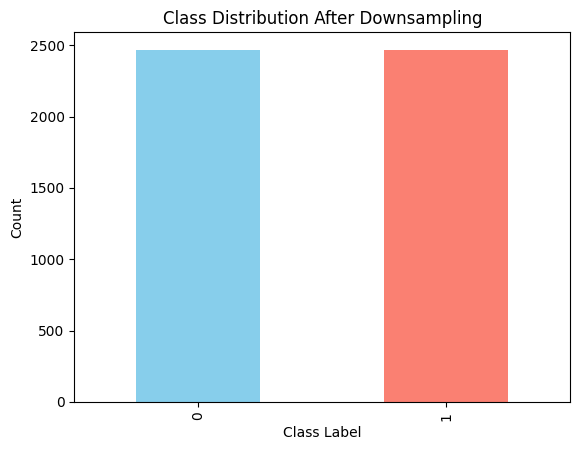

In [ ]:
# Create the bar plot with different colors
dataset[' Label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Class Distribution After Downsampling')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

Eliminate redundant variable

In [ ]:
dataset = dataset.drop([' Destination Port','Destination Port category'], axis=1)

drop null values

In [ ]:
# df = df.dropna()

In [ ]:
dataset.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Encoded Port
1156913,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,0.00000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0,2
1984417,69295.0,1.0,1.0,57.0,116.0,57.0,57.0,57.000000,0.000000,116.0,...,0.00000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0,1
1882832,116126060.0,115.0,202.0,3582.0,267199.0,439.0,0.0,31.147826,98.041366,1460.0,...,60024.58333,155850.7066,554917.0,14947.0,9617143.0,1318069.251,10000000.0,5432017.0,0,2
1441738,52.0,2.0,2.0,4.0,12.0,2.0,2.0,2.000000,0.000000,6.0,...,0.00000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0,0
1191513,30.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,0.00000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0,0


Verify the removal of null values

In [ ]:
dataset.isnull().sum()

,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
Total Length of Bwd Packets,0
...,...
Idle Std,0
Idle Max,0
Idle Min,0
Label,0


Eliminate entries containing "infinity or a value that exceeds the limitations of dtype('float64')" from the dataset (df).

In [ ]:
# Check for infinity and replace with NaN
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
dataset.dropna(inplace=True)

In [ ]:
# Rename columns to remove spaces
dataset.columns = [col.replace(' ', '') for col in dataset.columns]


In [ ]:
dataset.columns

Index(['FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets',
       'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets',
       'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean',
       'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin',
       'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowBytes/s',
       'FlowPackets/s', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax',
       'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax',
       'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax',
       'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags', 'BwdURGFlags',
       'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s', 'BwdPackets/s',
       'MinPacketLength', 'MaxPacketLength', 'PacketLengthMean',
       'PacketLengthStd', 'PacketLengthVariance', 'FINFlagCount',
       'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount', 'ACKFlagCount',
       'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount', 'Down/UpRatio',
       'Ave

## **Feature Selection**

In [ ]:
correlation_matrix = dataset.corr()
from IPython.display import display
display(correlation_matrix)


,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,EncodedPort
FlowDuration,1.000000,0.374748,0.280686,0.171603,0.231544,0.280274,-0.084926,0.105568,0.262127,0.534375,...,0.182145,0.208431,0.252470,0.122857,0.880223,0.250430,0.894528,0.850225,0.243197,0.453023
TotalFwdPackets,0.374748,1.000000,0.926645,0.342178,0.873316,0.248846,-0.050494,0.091471,0.172837,0.170352,...,0.216485,0.363758,0.402086,0.098563,0.159893,0.080211,0.168111,0.148350,-0.086439,0.172778
TotalBackwardPackets,0.280686,0.926645,1.000000,0.278831,0.955832,0.209806,-0.026716,0.066011,0.133251,0.162166,...,0.119661,0.261073,0.282873,0.058365,0.117391,0.041709,0.119876,0.111281,-0.082533,0.113397
TotalLengthofFwdPackets,0.171603,0.342178,0.278831,1.000000,0.171523,0.704079,0.017406,0.691899,0.649153,0.030589,...,0.129187,0.252474,0.235253,0.047153,0.059016,0.095032,0.070968,0.045578,-0.120958,0.014217
TotalLengthofBwdPackets,0.231544,0.873316,0.955832,0.171523,1.000000,0.119438,-0.033548,0.006115,0.061679,0.219021,...,0.084832,0.189903,0.223045,0.046167,0.138679,0.033586,0.139570,0.134382,0.014653,0.134012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IdleStd,0.250430,0.080211,0.041709,0.095032,0.033586,0.118058,-0.026264,0.114820,0.130401,0.168544,...,0.118405,0.120650,0.118020,0.079801,0.109484,1.000000,0.238511,-0.022113,0.086356,0.107315
IdleMax,0.894528,0.168111,0.119876,0.070968,0.139570,0.195878,-0.074029,0.083237,0.211315,0.593855,...,0.098849,0.044656,0.079794,0.089865,0.991115,0.238511,1.000000,0.965261,0.365481,0.445357
IdleMin,0.850225,0.148350,0.111281,0.045578,0.134382,0.169732,-0.068830,0.054396,0.182454,0.567835,...,0.055581,-0.003024,0.034874,0.062272,0.991278,-0.022113,0.965261,1.000000,0.352662,0.428374
Label,0.243197,-0.086439,-0.082533,-0.120958,0.014653,-0.107429,-0.153750,-0.142679,-0.060554,0.445032,...,0.029876,-0.049813,-0.019197,0.048443,0.361454,0.086356,0.365481,0.352662,1.000000,0.368373


In [ ]:
# Display correlation with the ' Label' column
correlation_with_label = correlation_matrix['Label'].sort_values(ascending=False)
correlation_with_label


,Label
Label,1.000000
BwdPacketLengthStd,0.449960
AvgBwdSegmentSize,0.447998
BwdPacketLengthMean,0.447998
BwdPacketLengthMax,0.445032
...,...
FwdAvgPackets/Bulk,NaN
FwdAvgBulkRate,NaN
BwdAvgBytes/Bulk,NaN
BwdAvgPackets/Bulk,NaN


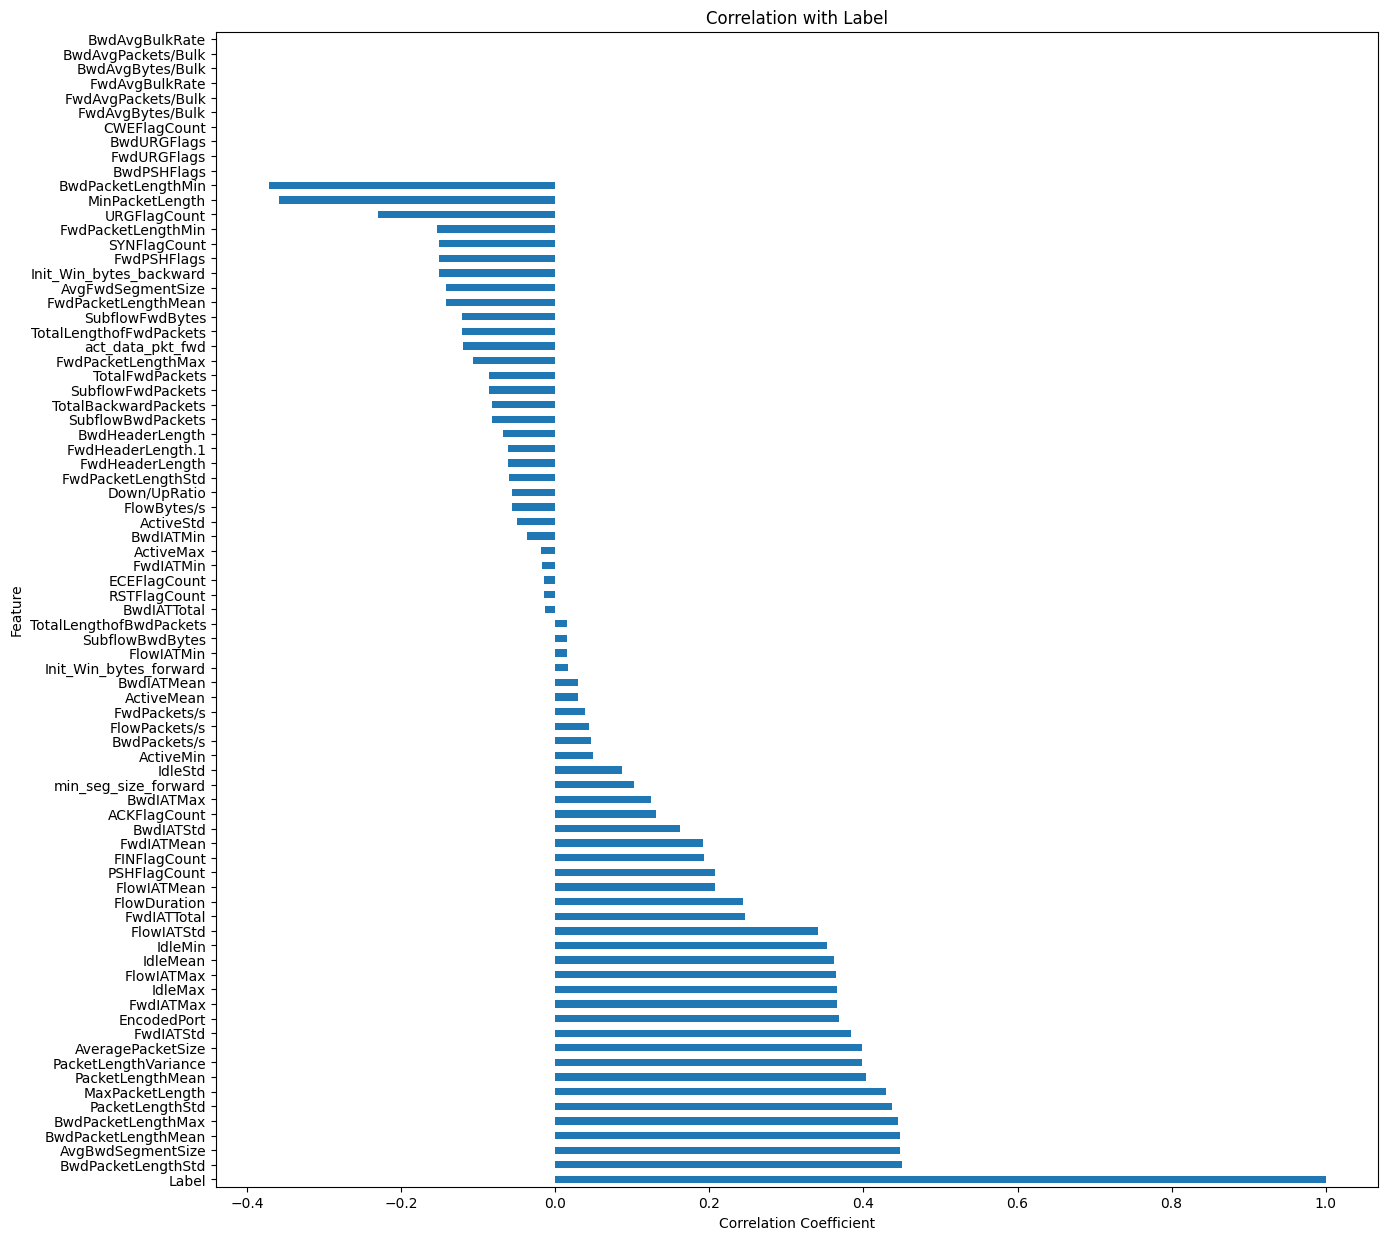

In [ ]:

import matplotlib.pyplot as plt



plt.figure(figsize=(15, 15))
correlation_with_label.plot(kind='barh')  # Create a horizontal bar chart
plt.title('Correlation with Label')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Get correlation with the target variable
correlation_with_label = correlation_matrix['Label'].abs()

# Select features with correlation coefficient >= 0.1
selected_features = correlation_with_label[correlation_with_label >= 0.1].index.tolist()

# Remove the target variable itself from the selected features
if 'Label' in selected_features:
    selected_features.remove('Label')

print("Selected Features:", selected_features)

# Create a new DataFrame with selected features and target variable
df_selected = dataset[selected_features + ['Label']]


Selected Features: ['FlowDuration', 'TotalLengthofFwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean', 'BwdPacketLengthMax', 'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'BwdIATStd', 'BwdIATMax', 'FwdPSHFlags', 'MinPacketLength', 'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'AveragePacketSize', 'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'SubflowFwdBytes', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'IdleMean', 'IdleMax', 'IdleMin', 'EncodedPort']


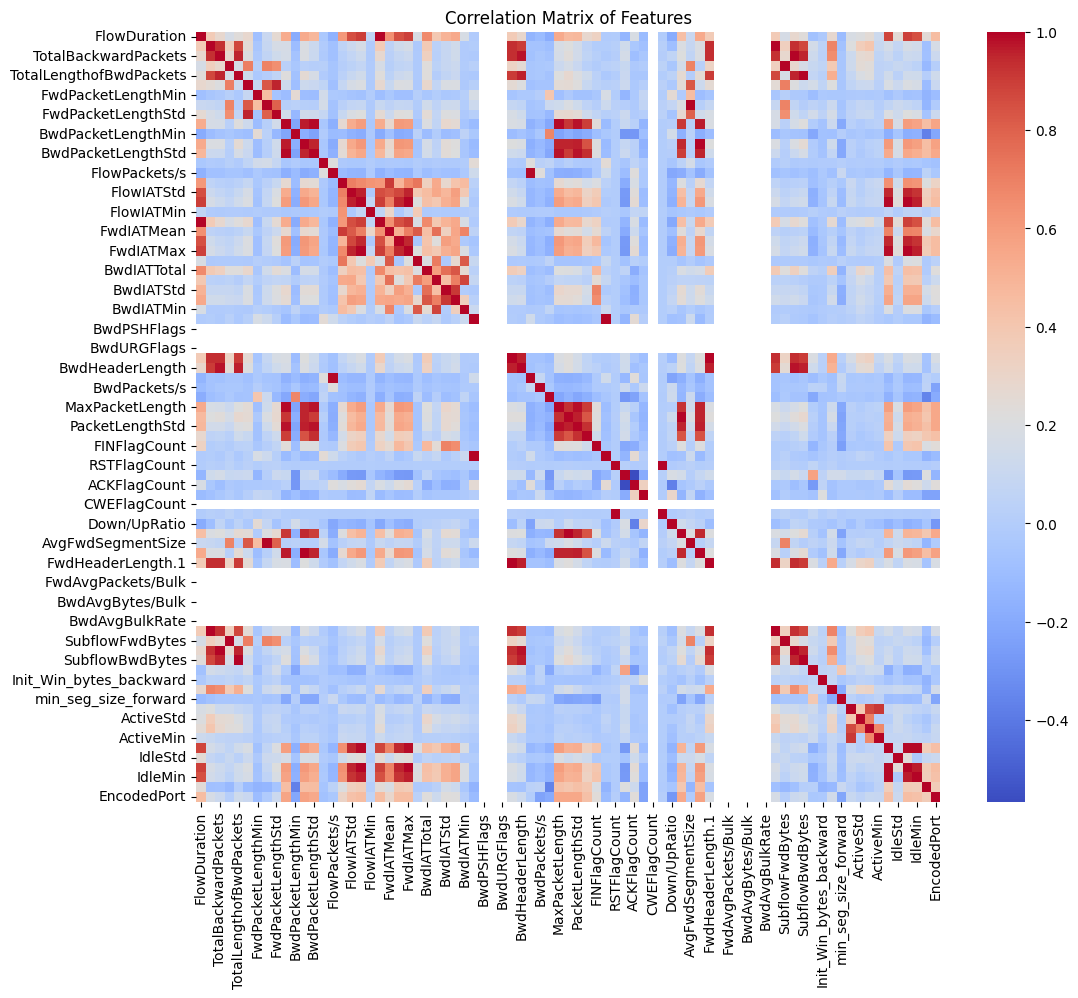

In [ ]:
import matplotlib.pyplot as plt

# Create the correlation matrix plot
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f") #annot=True to show values
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_matrix.png') # Save as PNG
plt.show()


Data Splitting

Data splitting refers to the process of partitioning data into two or more distinct subsets. In a common approach involving two segments, one portion is designated for evaluating or testing the data, while the other is reserved for training the model. This practice is a crucial element in the field of data science, especially when developing models that rely on data. By employing data splitting, we can enhance the accuracy of data-driven models and the methods that utilize them, such as machine learning.

In [ ]:
X = df_selected.drop("Label", axis=1)

In [ ]:
y = dataset['Label']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_test.columns

Index(['FlowDuration', 'TotalLengthofFwdPackets', 'FwdPacketLengthMax',
       'FwdPacketLengthMin', 'FwdPacketLengthMean', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FwdIATTotal', 'FwdIATMean',
       'FwdIATStd', 'FwdIATMax', 'BwdIATStd', 'BwdIATMax', 'FwdPSHFlags',
       'MinPacketLength', 'MaxPacketLength', 'PacketLengthMean',
       'PacketLengthStd', 'PacketLengthVariance', 'FINFlagCount',
       'SYNFlagCount', 'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount',
       'AveragePacketSize', 'AvgFwdSegmentSize', 'AvgBwdSegmentSize',
       'SubflowFwdBytes', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'IdleMean', 'IdleMax', 'IdleMin',
       'EncodedPort'],
      dtype='object')

**Feature Scalling**

Feature scaling is a vital preprocessing method that adjusts the values of features to a consistent scale, allowing each feature to contribute fairly to the model. This technique is crucial for datasets where features may have different ranges, units, or magnitudes. Frequently used scaling methods include standardization, normalization, and min-max scaling. By implementing feature scaling, the model's performance is enhanced, convergence is accelerated, and bias caused by features with larger value ranges is mitigated.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Ensure the test set is scaled the same way

In [ ]:

# Save y_test to a CSV file
y_test.to_csv('y_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

In [ ]:
# Save X_test to a CSV file
pd.DataFrame(X_test).to_csv('X_test.csv', index=False)
pd.DataFrame(X_train).to_csv('X_train.csv', index=False)

# **Model Development and Evaluation**

Models such as signature based, adaboost (Adaptive boosting), ANN (ArtificiaL Neural Networks) and Naive Bayes were developed and used to detect intrusion.  Hyperparameter optimization was used to obtain the best possible hyperparameter combintions to use and develop an optimal model. The models were evaluated  using quantitative metrics called evaluation metrics.

Evaluation metrics are quantitative benchmarks used to test the generalization ability and predictive power of machine learning models (Akshay et al. 2022). In this project the metrics employed are accuracy, precision, recall, and f-score.


Accuracy: this metric calculates the percentage of correctly predicted instances out of total instances (Hossin and Sulaiman 2015)
     

Precision(p):  measures the percentage of actual correctly predicted positive instances in all the predicted positive instances (Geng 2024).

Recall(r): measures the percentage of positive instances that are correctly predicted as positive instances out of total positive instances (Hossin and Sulaiman 2015)


F1 score:  This is the harmonic mean of recall and precision (Geng 2024). Represented as



## **Signature Based Approach**

preparing data for signature based IDS

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Combine X_test and y_test
X_test_df = pd.DataFrame(X_test)
combined_test_df = pd.concat([X_test_df, y_test], axis=1)


Designing the ruless based on the signatures identified

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def detect_intrusions(data):
    """Detects intrusions based on predefined signatures."""
    results = []

    for index, row in data.iterrows():
        attack_detected = False

        # Example signature: SYN Flood Attack
        if row['SYNFlagCount'] > 10:
            attack_detected = True

        # Example signature: UDP Flood Attack
        if row['BwdPackets/s'] > 1000:
            attack_detected = True

        # Example signature: High Packet Rate (Potential DDoS)
        if row['FlowPackets/s'] > 5000:
            attack_detected = True

        results.append("Intrusion" if attack_detected else "Normal")

    return results




Evaluating the performance of signature based ids

In [ ]:

# Run IDS detection
predictions = detect_intrusions(combined_test_df)

# Evaluate performance
true_labels = combined_test_df['Label'].apply(lambda x: "Intrusion" if x != 1 else "Normal")
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, pos_label="Intrusion")
recall = recall_score(true_labels, predictions, pos_label="Intrusion")
f1 = f1_score(true_labels, predictions, pos_label="Intrusion")

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5011
Precision: 0.5016
Recall: 0.3974
F1 Score: 0.4435


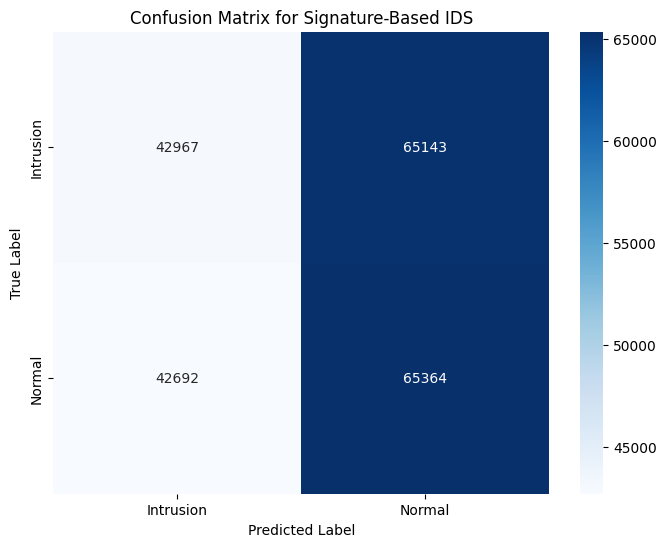

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=["Intrusion", "Normal"])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Intrusion", "Normal"], yticklabels=["Intrusion", "Normal"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Signature-Based IDS")
plt.show()


## **Adaboost**

In [ ]:
# Initializing the AdaBoost Classifier with Decision Tree as the base estimator
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9919028340080972
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.99      0.99      0.99       496

    accuracy                           0.99       988
   macro avg       0.99      0.99      0.99       988
weighted avg       0.99      0.99      0.99       988



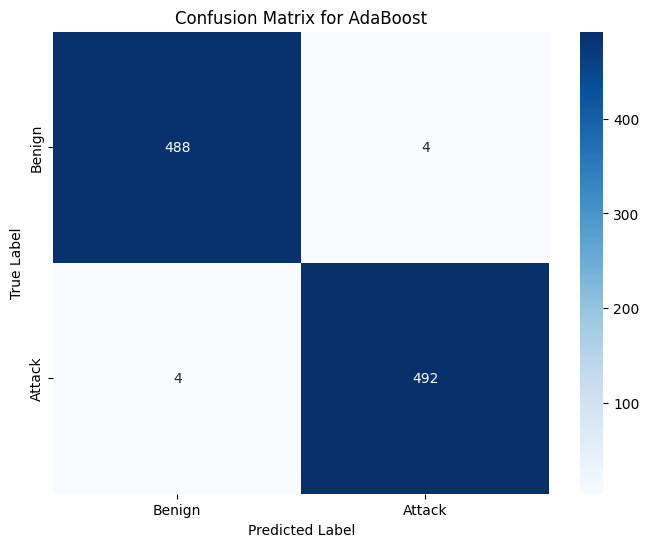

In [ ]:
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for AdaBoost")
plt.show()


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

print(classification_report(y_test, y_pred))

Accuracy: 0.9919028340080972
Precision: 0.9919354838709677
Recall: 0.9919354838709677
F1 Score: 0.9919354838709677
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.99      0.99      0.99       496

    accuracy                           0.99       988
   macro avg       0.99      0.99      0.99       988
weighted avg       0.99      0.99      0.99       988



## **Hyperparameter Optimization of Adaboost**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'estimator__max_depth': [1, 2, 3], # Max depth of the decision tree
}

# Create the AdaBoost classifier
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Best hyperparameters: {'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 200}
Best score: 0.9911344274919383
Test Accuracy: 0.9908906882591093
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       492
           1       1.00      0.99      0.99       496

    accuracy                           0.99       988
   macro avg       0.99      0.99      0.99       988
weighted avg       0.99      0.99      0.99       988



Accuracy: 0.9908906882591093
Precision: 0.9959266802443992
Recall: 0.9858870967741935
F1 Score: 0.9908814589665653
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       492
           1       1.00      0.99      0.99       496

    accuracy                           0.99       988
   macro avg       0.99      0.99      0.99       988
weighted avg       0.99      0.99      0.99       988



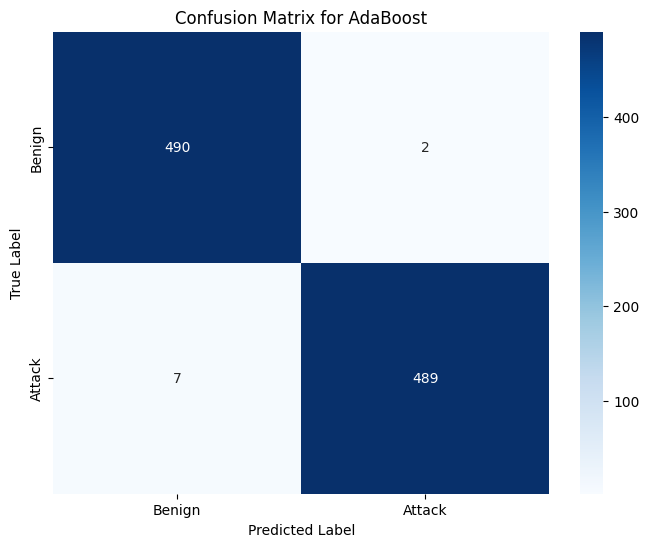

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

print(classification_report(y_test, y_pred))


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for AdaBoost")
plt.show()


## **Artificial Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

ANN Accuracy: 0.9908906882591093
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.99      0.99      0.99       496

    accuracy                           0.99       988
   macro avg       0.99      0.99      0.99       988
weighted avg       0.99      0.99      0.99       988



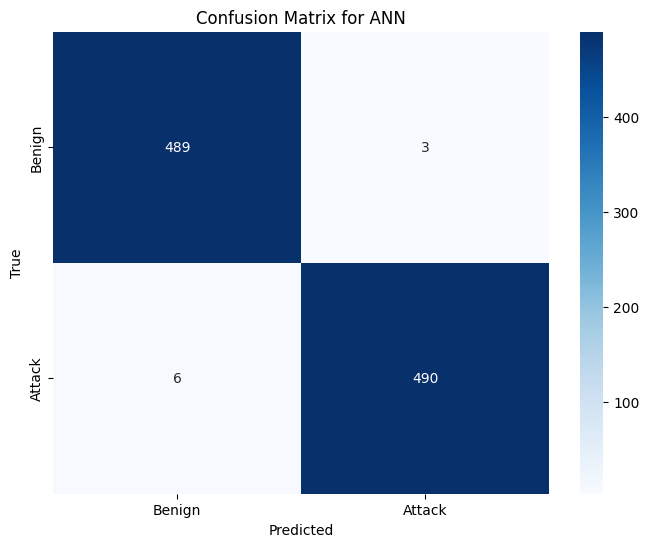

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the ANN classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42) # Example architecture

# Train the ANN
ann_classifier.fit(X_train, y_train)

# Make predictions
y_pred_ann = ann_classifier.predict(X_test)

# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {accuracy_ann}")

print(classification_report(y_test, y_pred_ann))

# Confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for ANN")
plt.show()


In [ ]:
# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {accuracy_ann}")

precision_ann = precision_score(y_test, y_pred_ann)
print(f"ANN Precision: {precision_ann}")

recall_ann = recall_score(y_test, y_pred_ann)
print(f"ANN Recall: {recall_ann}")

f1_an = f1_score(y_test, y_pred_ann)
print(f"ANN F1 Score: {f1_an}")

ANN Accuracy: 0.9908906882591093
ANN Precision: 0.9939148073022313
ANN Recall: 0.9879032258064516
ANN F1 Score: 0.9908998988877654


In [ ]:
import joblib

# Save the model to a file
joblib.dump(ann_classifier, 'ann_model.joblib')


['ann_model.joblib']

## **Hyperparamter Optimization of ANN**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for ANN
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Same options
    'activation': ['relu', 'tanh'],  # Same options
    'solver': ['adam'],  # Same options
    'alpha': [0.0001, 0.001],  # Same options
}

# Initialize the ANN classifier
ann_classifier = MLPClassifier(max_iter=10, random_state=42)  # Same max_iter for speed

# Use GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(ann_classifier, param_grid=param_grid,
                           cv=2, scoring='accuracy', n_jobs=-1)  # Removed n_iter since GridSearchCV tests all combinations

# Perform the search
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_ann_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

# Evaluate the best model
y_pred_ann_best = best_ann_model.predict(X_test)
accuracy_ann_best = accuracy_score(y_test, y_pred_ann_best)
print(f"Best ANN Accuracy: {accuracy_ann_best}")

print(classification_report(y_test, y_pred_ann_best))


Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Best ANN Accuracy: 0.9635627530364372
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       492
           1       0.95      0.98      0.96       496

    accuracy                           0.96       988
   macro avg       0.96      0.96      0.96       988
weighted avg       0.96      0.96      0.96       988



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9908906882591093
Precision: 0.9959266802443992
Recall: 0.9858870967741935
F1 Score: 0.9908814589665653
Confusion Matrix:
[[490   2]
 [  7 489]]


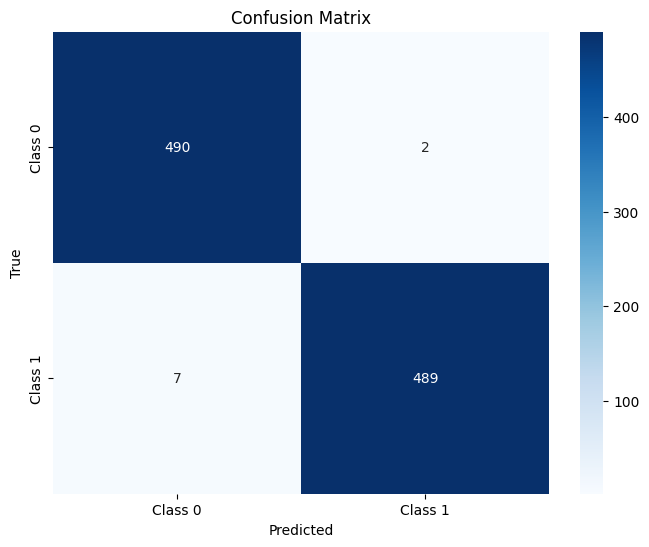

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can visualize the confusion matrix using seaborn or matplotlib:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## **Naive Bayes**

Naive Bayes Accuracy: 0.7206477732793523
Naive Bayes Precision: 0.8928571428571429
Naive Bayes Recall: 0.5040322580645161
Naive Bayes F1 Score: 0.6443298969072165
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       492
           1       0.89      0.50      0.64       496

    accuracy                           0.72       988
   macro avg       0.77      0.72      0.71       988
weighted avg       0.77      0.72      0.71       988



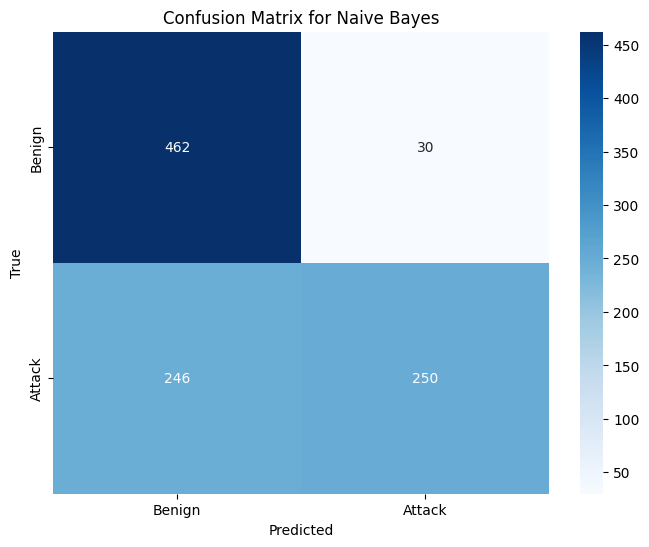

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Naive Bayes Accuracy: {accuracy_gnb}")

precision_gnb = precision_score(y_test, y_pred_gnb)
print(f"Naive Bayes Precision: {precision_gnb}")

recall_gnb = recall_score(y_test, y_pred_gnb)
print(f"Naive Bayes Recall: {recall_gnb}")

f1_gnb = f1_score(y_test, y_pred_gnb)
print(f"Naive Bayes F1 Score: {f1_gnb}")

print(classification_report(y_test, y_pred_gnb))

# Compute and plot the confusion matrix for Naive Bayes
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


## **Hyperparameter Optimizatin of Naive Bayes**

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define parameter grid (Priors)
param_grid_nb = {'priors': [[0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], None]}

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform Grid Search
grid_search_nb = GridSearchCV(gnb, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Get best parameters and model
best_params_nb = grid_search_nb.best_params_
best_gnb_model = grid_search_nb.best_estimator_

print(f"Best Hyperparameters for Naive Bayes: {best_params_nb}")

# Evaluate the best model
y_pred_gnb_best = best_gnb_model.predict(X_test)
accuracy_gnb_best = accuracy_score(y_test, y_pred_gnb_best)
print(f"Best Naive Bayes Accuracy: {accuracy_gnb_best}")
print(classification_report(y_test, y_pred_gnb_best))


Best Hyperparameters for Naive Bayes: {'priors': [0.5, 0.5]}
Best Naive Bayes Accuracy: 0.7206477732793523
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       492
           1       0.89      0.50      0.64       496

    accuracy                           0.72       988
   macro avg       0.77      0.72      0.71       988
weighted avg       0.77      0.72      0.71       988



Accuracy: 0.7206477732793523
Precision: 0.8928571428571429
Recall: 0.5040322580645161
F1 Score: 0.6443298969072165
Confusion Matrix:
[[462  30]
 [246 250]]


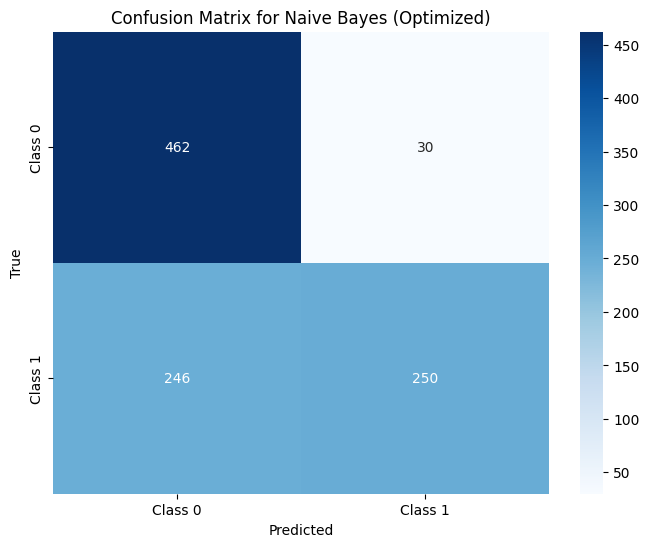

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_gnb_best)
precision = precision_score(y_test, y_pred_gnb_best)
recall = recall_score(y_test, y_pred_gnb_best)
f1 = f1_score(y_test, y_pred_gnb_best)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb_best)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn or matplotlib:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes (Optimized)")
plt.show()


## **K Nearest Neighbour**

KNN Accuracy: 0.9858299595141701
KNN Precision: 0.9918367346938776
KNN Recall: 0.9798387096774194
KNN F1 Score: 0.9858012170385395
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       492
           1       0.99      0.98      0.99       496

    accuracy                           0.99       988
   macro avg       0.99      0.99      0.99       988
weighted avg       0.99      0.99      0.99       988



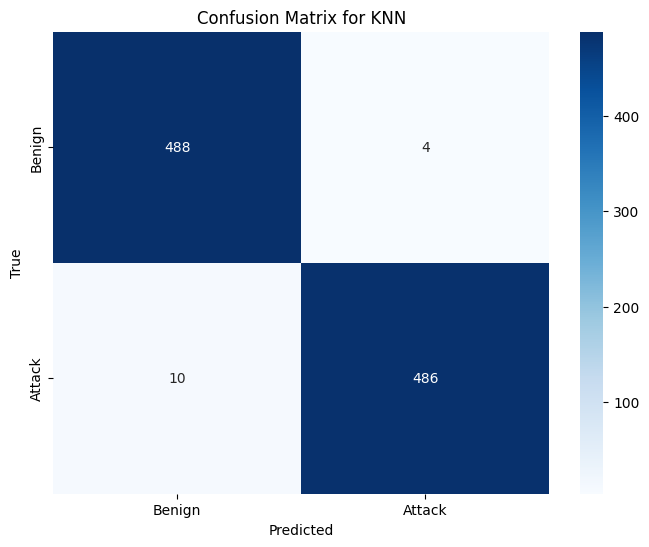

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=5 (you can adjust this)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

precision_knn = precision_score(y_test, y_pred_knn)
print(f"KNN Precision: {precision_knn}")

recall_knn = recall_score(y_test, y_pred_knn)
print(f"KNN Recall: {recall_knn}")

f1_knn = f1_score(y_test, y_pred_knn)
print(f"KNN F1 Score: {f1_knn}")

print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()


## **Hyperparameter Optimization of KNN**

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN Accuracy: 0.9898785425101214
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.99      0.99      0.99       496

    accuracy                           0.99       988
   macro avg       0.99      0.99      0.99       988
weighted avg       0.99      0.99      0.99       988

Precision: 0.9879518072289156
Recall: 0.9919354838709677
F1 Score: 0.9899396378269618


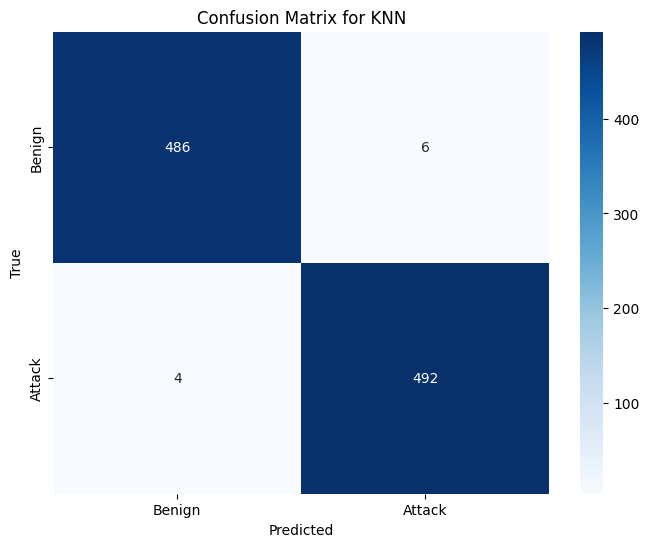

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') # 5-fold cross validation

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

# Evaluate the best model
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f"Best KNN Accuracy: {accuracy_knn_best}")

print(classification_report(y_test, y_pred_knn_best))

# Calculate additional metrics
precision_knn = precision_score(y_test, y_pred_knn_best)
recall_knn = recall_score(y_test, y_pred_knn_best)
f1_knn = f1_score(y_test, y_pred_knn_best)

print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()


## **Gradient Boosting**

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)


Accuracy: 0.9908906882591093
Precision: 0.9939148073022313
Recall: 0.9879032258064516
F1 Score: 0.9908998988877654


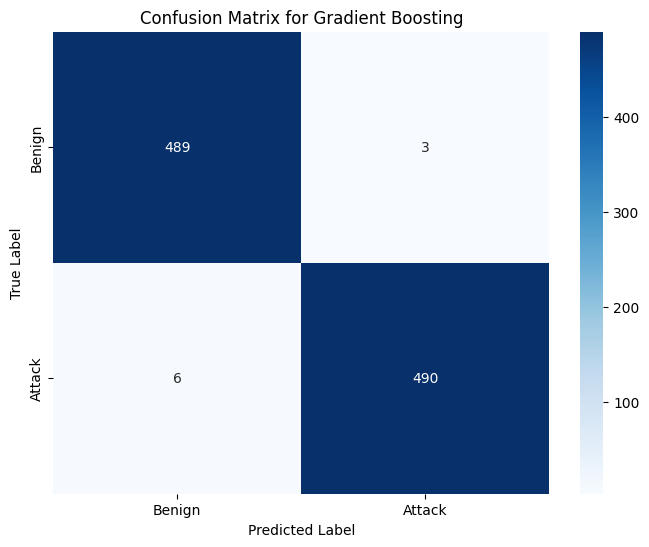

In [ ]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()


## **Hyperparametr Optimization of Gradient Boost**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print the results
print(f"Best Parameter: {best_params}")
print(f"Best Model Accuracy: {accuracy_best}")


Best Parameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Model Accuracy: 0.9919028340080972


Accuracy: 0.9919028340080972
Precision: 0.9939271255060729
Recall: 0.9899193548387096
F1 Score: 0.9919191919191919


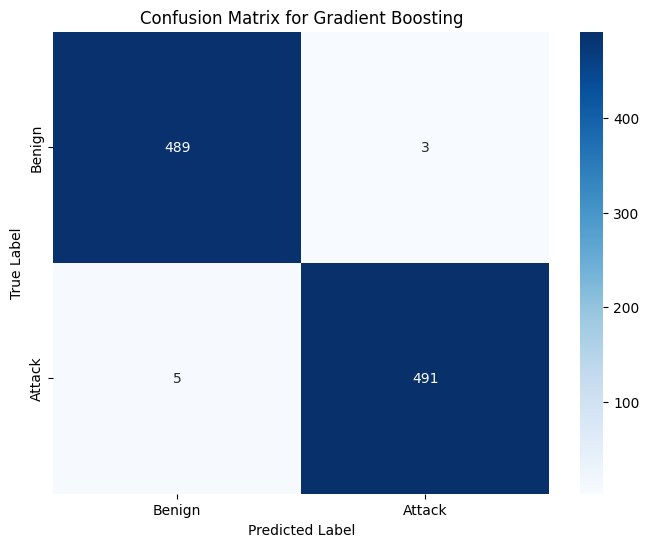

In [ ]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()


## **Extreme Gradient Boosting**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score



# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


XGBoost Accuracy: 0.992914979757085


In [ ]:
# Make predictions with the xgboost model
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb}")
print(f"XGBoost Recall: {recall_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")


XGBoost Accuracy: 0.992914979757085
XGBoost Precision: 0.9939393939393939
XGBoost Recall: 0.9919354838709677
XGBoost F1 Score: 0.992936427850656


## **Hyperparameter Optimization of Extreme Gradient Boosting**

In [ ]:

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

# Evaluate the best model
y_pred_xgb_best = best_xgb_model.predict(X_test)
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
print(f"Best XGBoost Accuracy: {accuracy_xgb_best}")

print(classification_report(y_test, y_pred_xgb_best))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost Accuracy: 0.9908906882591093
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       492
           1       1.00      0.99      0.99       496

    accuracy                           0.99       988
   macro avg       0.99      0.99      0.99       988
weighted avg       0.99      0.99      0.99       988



Accuracy: 0.9908906882591093
Precision: 0.9959266802443992
Recall: 0.9858870967741935
F1 Score: 0.9908814589665653
Confusion Matrix:
[[490   2]
 [  7 489]]


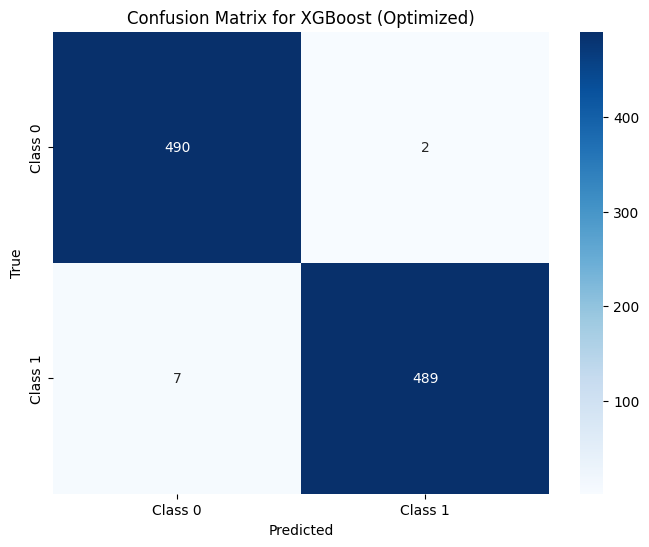

In [ ]:
accuracy = accuracy_score(y_test, y_pred_xgb_best)
precision = precision_score(y_test, y_pred_xgb_best)
recall = recall_score(y_test, y_pred_xgb_best)
f1 = f1_score(y_test, y_pred_xgb_best)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_best)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn or matplotlib:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for XGBoost (Optimized)")
plt.show()
